# __Introduction__
------------------

### The modern Olympic Games or Olympics are the leading international sporting events featuring summer and winter sports competitions in which thousands of athletes from around the world participate in a variety of competitions.
### The Olympic Games are considered the world's foremost sports competition with more than 200 nations participating.
### The Olympic Games are normally held every four years, alternating between the Summer and Winter Olympics every two years        in the four-year period.
### This dataset contains information about the athletes who won medals,from where they are and in which year they won the medal.
### This dataset contains 8616 observation and 10 column .

# __Aim__
----------------

### My goal is to shed light on major patterns in Olympic history. How many athletes won gold,silver and bronze medal. Where do most athletes come from? Who wins more medals in which year.

In [1]:
#import librairies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import re
import plotly.express as px

In [2]:
#read data
df = pd.read_csv("C:/Users/test/Downloads/olympix_data_organized_with_header (1).csv")
df.head()

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,2008,8/24/2008,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,8/29/2004,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,08-12-2012,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,8/24/2008,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,10-01-2000,Gymnastics,2,1,3,6


# __Description of the Variables__
-------------------------------------

| Variable | Explanation of the variable | 
  | --- | --- | 
  |name | Name of the player |
  |age |Age of the player in years|
  |country | From which country they belongs to  |
  |year |In which they played|
  |Date_Given |On which date they played|
  |Sports|Which sports they played|
  |Gold_medal|Number of gold_medal they won|
  |Silver_medal|Number of silver_medal they won|
  |Bronze_medal|Number of bronze_medal they won|
  |Total_medal|Total number of medals they won|

In [3]:
#shape of the data
df.shape

(8618, 10)

In [4]:
#info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          8613 non-null   object 
 1   age           8613 non-null   float64
 2   country       8618 non-null   object 
 3   year          8618 non-null   int64  
 4   Date_Given    8618 non-null   object 
 5   sports        8618 non-null   object 
 6   gold_medal    8618 non-null   int64  
 7   silver_medal  8618 non-null   int64  
 8   brone_medal   8618 non-null   int64  
 9   total_medal   8618 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 673.4+ KB


## Basic exploration of the data

In [5]:
#change column
df.rename(columns={'brone_medal':'bronze_medal'}, inplace=True)

In [6]:
#change Date_Given to datetime
df.Date_Given = pd.to_datetime(df.Date_Given)

In [7]:
#describe the data
df.describe()

,age,year,gold_medal,silver_medal,bronze_medal,total_medal
count,8613.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,26.405434,2005.978881,0.364702,0.363309,0.377698,1.105709
std,5.102118,4.289946,0.545349,0.511613,0.505005,0.408892
min,15.000000,2000.000000,0.000000,0.000000,0.000000,1.000000
25%,23.000000,2002.000000,0.000000,0.000000,0.000000,1.000000
50%,26.000000,2006.000000,0.000000,0.000000,0.000000,1.000000
75%,29.000000,2010.000000,1.000000,1.000000,1.000000,1.000000
max,61.000000,2012.000000,8.000000,3.000000,3.000000,8.000000


## Deal with missing values

In [8]:
#null values
df.isnull().sum()

name            5
age             5
country         0
year            0
Date_Given      0
sports          0
gold_medal      0
silver_medal    0
bronze_medal    0
total_medal     0
dtype: int64

In [9]:
#rows where age is null
df.loc[df.age.isnull()]

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,bronze_medal,total_medal
1428,NaN,NaN,Brazil,2012,2012-08-12,Volleyball,0,1,0,1
1429,NaN,NaN,Brazil,2012,2012-08-12,Volleyball,0,1,0,1
1430,NaN,NaN,Brazil,2012,2012-08-12,Volleyball,0,1,0,1
4485,NaN,NaN,Argentina,2012,2012-08-12,Hockey,0,1,0,1
4486,NaN,NaN,Argentina,2012,2012-08-12,Hockey,0,1,0,1


In [10]:
#drop null values
df.dropna(inplace=True)

### We can remove null values because it is very less in quantity..

## Duplicates in the dataset

In [11]:
#duplicate values
df.duplicated().sum()

0

### There is no duplicates in Data set

In [12]:
#change data type of age,year , gold medal,silver medal and bronze medal to int
df['age'] = df['age'].astype(int)
df['year'] = df['year'].astype(int)
df['gold_medal'] = df['gold_medal'].astype(int)
df['silver_medal'] = df['silver_medal'].astype(int)
df['bronze_medal'] = df['bronze_medal'].astype(int)

In [13]:
#data with only numeric columns
df_numeric = df.select_dtypes(include=['int64', 'float64','int32']).drop(['year'], axis=1)

#IQR
for i in df_numeric.columns:
    Q1 = df_numeric[i].quantile(0.25)
    Q3 = df_numeric[i].quantile(0.75)
    IQR = Q3 - Q1

#Outliers
    print("Column name:",i)
    print("---------------------------")
    print("Outliers :",df_numeric.loc[(df_numeric[i] < (Q1 - 1.5 * IQR)) | (df_numeric[i] > (Q3 + 1.5 * IQR))].shape)

#Extreme Outliers
    print("Extreme Outliers :",df_numeric.loc[(df_numeric[i] < (Q1 - 3 * IQR)) | (df_numeric[i] > (Q3 + 3 * IQR))].shape)
    print(" ")

Column name: age
---------------------------
Outliers : (192, 5)
Extreme Outliers : (16, 5)
 
Column name: gold_medal
---------------------------
Outliers : (29, 5)
Extreme Outliers : (2, 5)
 
Column name: silver_medal
---------------------------
Outliers : (9, 5)
Extreme Outliers : (0, 5)
 
Column name: bronze_medal
---------------------------
Outliers : (5, 5)
Extreme Outliers : (0, 5)
 
Column name: total_medal
---------------------------
Outliers : (697, 5)
Extreme Outliers : (697, 5)
 


### We can't drop or replace outliers here.. Because if we drop them, we will lose informations of total medals for different countries  & name  or if we replace the data , then also we will not get accurate result for total medals w.r.t name , country or year..

## Remove special characters from the name column

In [14]:
#unique values in name column
df.name.unique()

array(['Michael Phelps', 'Natalie Coughlin', 'Aleksey Nemov', ...,
       'Wietse van Alten', 'Sandra Wagner-Sachse', 'Rod White'],
      dtype=object)

In [15]:
'''df1 = df.copy()
def strip_name(name):
    r = re.compile(r'[^a-zA-Z !@#$%&* _+-=| \ : ";<>, . / () [\]{}\']')
    return r.sub('', name)
df1['name'] = df1['name'].apply(strip_name)
df1.shape'''

'df1 = df.copy()\ndef strip_name(name):\n    r = re.compile(r\'[^a-zA-Z !@#$%&* _+-=| \\ : ";<>, . / () [\\]{}\']\')\n    return r.sub(\'\', name)\ndf1[\'name\'] = df1[\'name\'].apply(strip_name)\ndf1.shape'

In [16]:
#Please remove special characters from the name column
def clean_name(name):
    
    pattern = r'[^A-Za-z .]+'
    return re.sub(pattern, '', name)
df['name'] = df['name'].apply(clean_name)

In [17]:
df.head()

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,bronze_medal,total_medal
0,Michael Phelps,23,United States,2008,2008-08-24,Swimming,8,0,0,8
1,Michael Phelps,19,United States,2004,2004-08-29,Swimming,6,0,2,8
2,Michael Phelps,27,United States,2012,2012-08-12,Swimming,4,2,0,6
3,Natalie Coughlin,25,United States,2008,2008-08-24,Swimming,1,2,3,6
4,Aleksey Nemov,24,Russia,2000,2000-10-01,Gymnastics,2,1,3,6


## Data visualization techniques to appropriate columns

In [18]:
# groupby country with total medals
total_medals = df.groupby('country')['total_medal'].sum().reset_index()
top_5_countries = total_medals.sort_values(by='total_medal', ascending=False).head(5)
top_5_countries

,country,total_medal
104,United States,1312
80,Russia,768
37,Germany,629
4,Australia,609
18,China,530


In [19]:
#Top 5 countries with most medals
fig1 = px.bar(top_5_countries, y='country', x='total_medal', title='Total Medals by top 5 Countries')
fig1.show()

### Here we can see top 5 Countries with medals and here US is having the mosst number of medals

In [23]:
#rows where country is United States,Russia,Germany,China,Australia
df_top_country = df.loc[df.country.isin(['United States'])]
df_US = df_top_country.groupby('year')['total_medal'].sum().reset_index()

In [24]:
fig4 = px.line(df_US, x='year', y='total_medal', title='Total Medals by US in different years')
fig4.show()

### Here we can see total medals won by US in different years and in 2006 it is least and in next olympic in 2008 it is the highest..

In [ ]:
#group by age with total medals
df_age = df.groupby('age')['total_medal'].sum().reset_index()

In [ ]:
#age vs total medals
fig2 = px.bar(df_age, x='age', y='total_medal', title='Total Medals in each age group')
fig2.show()

### Here we can see the total medals won by athlits in different age group.. And we can say younger age that is 20-30 age group is more active and are win more medals

In [ ]:
#rows where age is more than 50
df_age_50 = df.loc[df.age > 50]

Text(0.5, 1.0, 'Total Medals by Sports after age 50')

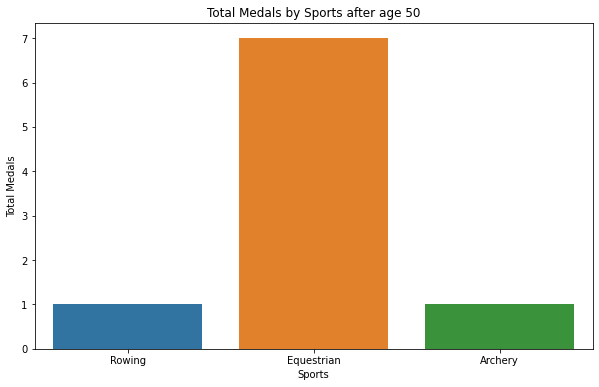

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='sports', data=df_age_50)
plt.xlabel('Sports')
plt.ylabel('Total Medals')
plt.title('Total Medals by Sports after age 50')

### Here we can see in Equestrian sports people win more medals than other sports after age 50

In [ ]:
#groupby name and sum of gld medals
df_top_name = df.groupby('name')['gold_medal'].sum().reset_index()
df_top5_name = df_top_name.sort_values(by='gold_medal', ascending=False).head(5)
df_top5_name

,name,gold_medal
4315,Michael Phelps,18
1125,Chris Hoy,6
6347,Usain Bolt,6
2051,Georgeta DamianAndrunache,5
6911,Zou Kai,5


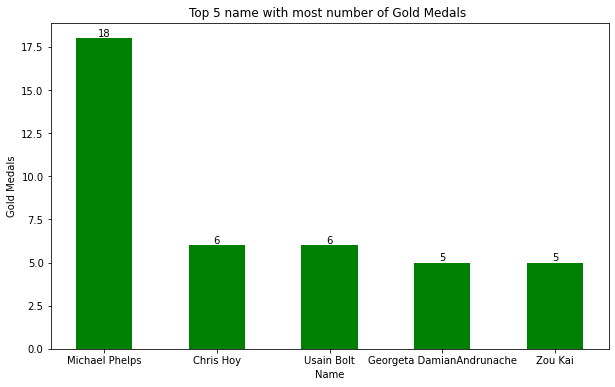

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
x = df_top5_name['name']
y = df_top5_name['gold_medal']
bars = ax.bar(x, y, width=0.5, color='green')
plt.xlabel('Name')
plt.ylabel('Gold Medals')
plt.title('Top 5 name with most number of Gold Medals ')
for bar in bars:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{height}', ha='center',
  va='bottom')
plt.show()

### We can see here top 5 people with most number of gold medals and Michael Phelps is having way more gold medals than others.

## Check age dataset is skewed or symmetric

c:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


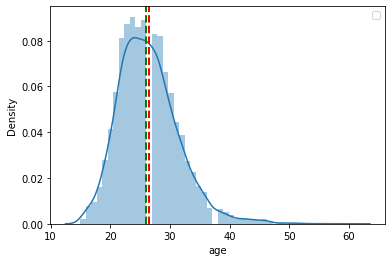

In [ ]:
#Distribution of Age
sns.distplot(df['age'])
plt.axvline(df['age'].mean(),color='r',linestyle='dashed',linewidth=2)
plt.axvline(df['age'].median(),color='g',linestyle='dashed',linewidth=2)
plt.legend()

### Here we can see age is moderately right skewed...

In [ ]:
#skewness of age
df['age'].skew()

0.8590070668484233

### Age is moderately right skewed as the skewness value lies between 1 to 0.5

In [ ]:
#square root transformation of age
df['age'] = np.sqrt(df['age'])

In [ ]:
#skewness of age
df['age'].skew()

0.4898373817405729

### Now it is normally distributed

## numerical measures on each column 

In [ ]:
#mode of categorical columns

print("Mode of Name :",df['name'].mode()[0])
print("Mode of Country :",df['country'].mode()[0])
print("Mode of Date :",df['Date_Given'].mode()[0])
print("Mode of Sports :",df['sports'].mode()[0])
print("Mode of Year :",df['year'].mode()[0])
print("   ")
print(" ")


#mean , mode, median , SD, variance,IQR of numerical columns

for i in  df_numeric.columns:
    Q1 = df_numeric[i].quantile(0.25)
    Q3 = df_numeric[i].quantile(0.75)
    IQR = Q3 - Q1
    print(f"Mean of {i} : ",df_numeric[i].mean())
    print(f"Mode of {i} :",df_numeric[i].mode()[0])
    print(f"Median of {i} :",df_numeric[i].median())
    print(f"Standard Deiation of {i} :",df_numeric[i].std())
    print(f"Variance of {i} :",df_numeric[i].var())
    print(f"IQR of {i} :",IQR)
    print(" ")

Mode of Name : Anky van Grunsven
Mode of Country : United States
Mode of Date : 2008-08-24 00:00:00
Mode of Sports : Athletics
Mode of Year : 2008
   
 
Mean of age :  26.405433646812956
Mode of age : 24
Median of age : 26.0
Standard Deiation of age : 5.102118191961382
Variance of age : 26.03161004474328
IQR of age : 6.0
 
Mean of gold_medal :  0.36491350284453733
Mode of gold_medal : 0
Median of gold_medal : 0.0
Standard Deiation of gold_medal : 0.5454363359989107
Variance of gold_medal : 0.2975007966279167
IQR of gold_medal : 1.0
 
Mean of silver_medal :  0.36293974225008707
Mode of silver_medal : 0
Median of silver_medal : 0.0
Standard Deiation of silver_medal : 0.5115310349685308
Variance of silver_medal : 0.26166399973597626
IQR of silver_medal : 1.0
 
Mean of bronze_medal :  0.3779171020550331
Mode of bronze_medal : 0
Median of bronze_medal : 0.0
Standard Deiation of bronze_medal : 0.5050694967667295
Variance of bronze_medal : 0.2550951965641974
IQR of bronze_medal : 1.0
 
Mean o

## Top 10 countries with the gold medal

In [ ]:
#top 10 countries with most gold medals
top_gold = df.groupby('country')['gold_medal'].sum().reset_index()
top_10_gold = top_gold.sort_values(by = 'gold_medal', ascending=False).head(10)

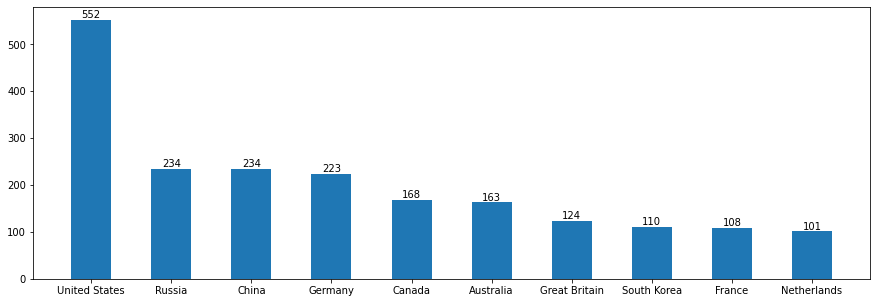

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
x = top_10_gold['country']
y = top_10_gold['gold_medal']
bars = ax.bar(x, y, width=0.5)
for bar in bars:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{height}', ha='center',
  va='bottom')
plt.show()

## Top 10 countries with the Silver medal

In [ ]:
#top 10 countries with most silver medals
top_silver = df.groupby('country')['silver_medal'].sum().reset_index()
top_10_silver = top_silver.sort_values(by = 'silver_medal', ascending=False).head(10)

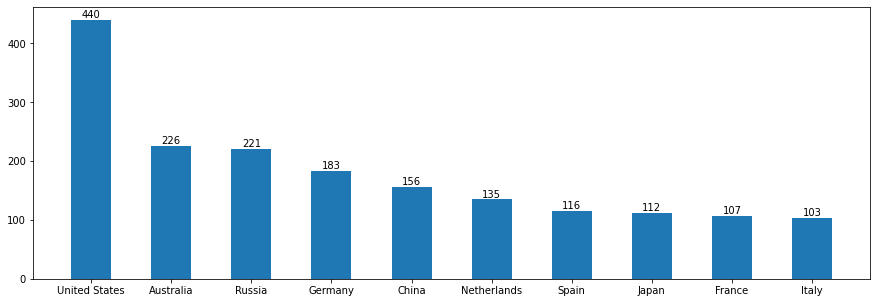

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
x = top_10_silver['country']
y = top_10_silver['silver_medal']
bars = ax.bar(x, y, width=0.5)
for bar in bars:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{height}', ha='center',
  va='bottom')
plt.show()

## Top 10 countries with the Bronze medal

In [ ]:
#top 10 countries with most bronze medals
top_bronze = df.groupby('country')['bronze_medal'].sum().reset_index()
top_10_bronze = top_bronze.sort_values(by = 'bronze_medal', ascending=False).head(10)

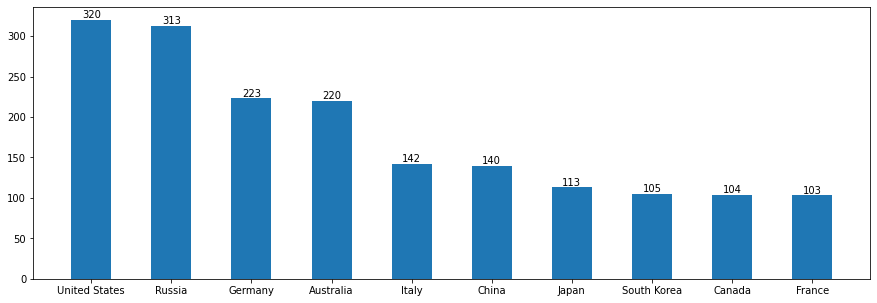

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
x = top_10_bronze['country']
y = top_10_bronze['bronze_medal']
bars = ax.bar(x, y, width=0.5)
for bar in bars:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{height}', ha='center',
  va='bottom')
plt.show()

## Top 10 countries with the Total medal

In [ ]:
#top 10 countries with most medals
top_total = df.groupby('country')['total_medal'].sum().reset_index()
top_10_total = top_total.sort_values(by = 'total_medal', ascending=False).head(10)

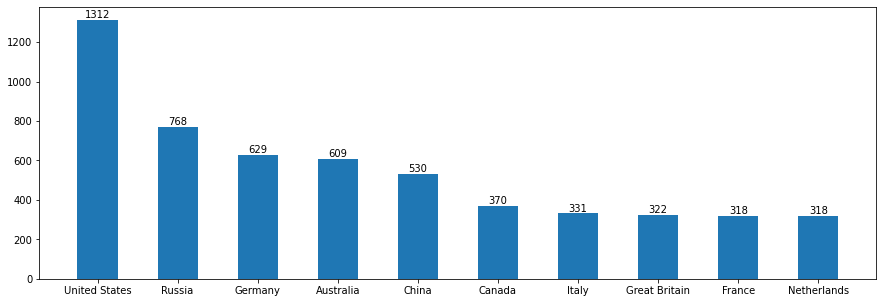

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
x = top_10_total['country']
y = top_10_total['total_medal']
bars = ax.bar(x, y, width=0.5)
for bar in bars:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{height}', ha='center',
  va='bottom')
plt.show()

In [ ]:
#save the data
#df.to_csv("C:/Users/test/Downloads/olympix_data_organized_with_header (2).csv", index=False)